# Test diffractio

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.utils_drawing import draw_several_fields
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from matplotlib import rcParams

rcParams['figure.figsize']=(7,5)
rcParams['figure.dpi']=75

number of processors: 4
total memory        : 6.0 Gb
available memory    : 52 %
max frequency       : 2794 GHz


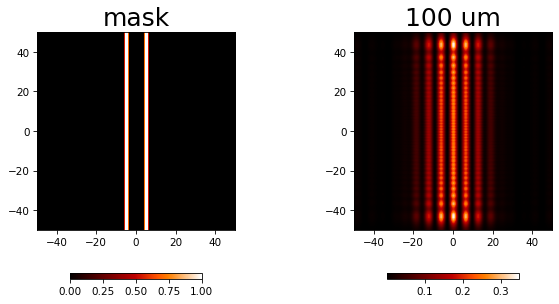

In [3]:
num_pixels = 512

length = 100 * um
x0 = np.linspace(-length / 2, length / 2, num_pixels)
y0 = np.linspace(-length / 2, length / 2, num_pixels)
wavelength = 0.6238 * um

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.plane_wave(A=1, theta=0 * degrees, phi=0 * degrees)

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.double_slit(x0=0, size=2 * um, separation=10 * um, angle=0 * degrees)

u2 = u1 * t1

u3 = u2.RS(z=100 * um, new_field=True)

draw_several_fields((u2,u3), titles=('mask',  '100 um'))

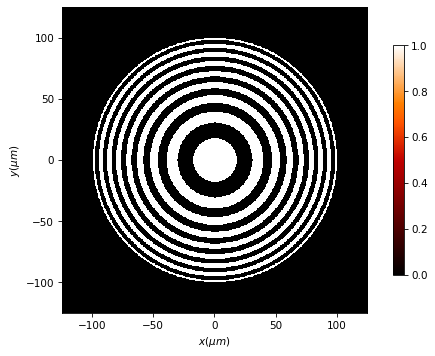

In [4]:
num_pixels = 512

length = 250 * um
x0 = np.linspace(-length / 2, length / 2, num_pixels)
y0 = np.linspace(-length / 2, length / 2, num_pixels)
wavelength = 0.6238 * um

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.plane_wave(A=1, theta=0 * degrees, phi=0 * degrees)

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.fresnel_lens(r0=(0 * um, 0 * um),radius=(100 * um, 100 * um),focal=(1 * mm, 1 * mm),
                angle=0 * degrees,kind='amplitude', phase=0, mask=True)

u2 = u1 * t1
u2.draw('intensity', has_colorbar='vertical');

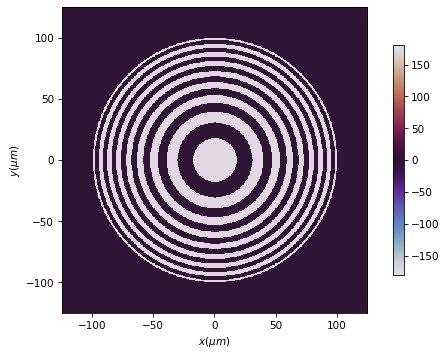

In [5]:
num_pixels = 512

length = 250 * um
x0 = np.linspace(-length / 2, length / 2, num_pixels)
y0 = np.linspace(-length / 2, length / 2, num_pixels)
wavelength = 0.6238 * um

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.plane_wave(A=1, theta=0 * degrees, phi=0 * degrees)

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)

t1.fresnel_lens(r0=(0 * um, 0 * um),radius=(100 * um, 100 * um),focal=(1 * mm, 1 * mm),
                angle=0 * degrees ,kind='phase', phase=np.pi, mask=True)
u2 = u1 * t1

u2.draw('phase', has_colorbar='vertical');